In [38]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import json

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

# Access:
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''

In [40]:
# We import our access keys:
#from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [41]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="elonmusk", count = 200)

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

@tiamaria68uk Plus a towel and a sign saying “Don’t Panic”

On Tuesday, SpaceX will attempt to refly both an orbital rocket and spacecraft for the first… https://t.co/Wm5SpjNdMb

@tiamaria68uk Yes

@FortuneTech Do it

The *real* money comes from merchandising. I learned it from this documentary https://t.co/E4gpqhl6KF



In [42]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@tiamaria68uk Plus a towel and a sign saying “...
1,"On Tuesday, SpaceX will attempt to refly both ..."
2,@tiamaria68uk Yes
3,@FortuneTech Do it
4,The *real* money comes from merchandising. I l...
5,@sm_carl Deal
6,That special hat delivery will take place deep...
7,@NefuDaBoss Beyond anything you can imagine
8,"@TheRealUtkarsh And, at the risk of stating th..."
9,@TheRealUtkarsh Because it’s stupid


In [22]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [43]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

939005893634506752
2017-12-08 05:37:05
Twitter for iPhone
580
59
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'tiamaria68uk', 'name': 'TweetleTi', 'id': 74323453, 'id_str': '74323453', 'indices': [0, 13]}], 'urls': []}


In [44]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [45]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@tiamaria68uk Plus a towel and a sign saying “...,58,939005893634506752,2017-12-08 05:37:05,Twitter for iPhone,580,59
1,"On Tuesday, SpaceX will attempt to refly both ...",117,938972633416306690,2017-12-08 03:24:55,Instagram,26250,4217
2,@tiamaria68uk Yes,17,938947119246860290,2017-12-08 01:43:32,Twitter for iPhone,453,18
3,@FortuneTech Do it,18,938816780444745728,2017-12-07 17:05:37,Twitter for iPhone,96961,21306
4,The *real* money comes from merchandising. I l...,101,937447589460426752,2017-12-03 22:24:56,Twitter for iPhone,21032,3829
5,@sm_carl Deal,13,937446602393841664,2017-12-03 22:21:01,Twitter for iPhone,851,30
6,That special hat delivery will take place deep...,140,937411489635241984,2017-12-03 20:01:30,Twitter for iPhone,10399,822
7,@NefuDaBoss Beyond anything you can imagine,43,937405455768346624,2017-12-03 19:37:31,Twitter for iPhone,943,46
8,"@TheRealUtkarsh And, at the risk of stating th...",73,937404412858740736,2017-12-03 19:33:22,Twitter for iPhone,1240,31
9,@TheRealUtkarsh Because it’s stupid,35,937403444192624640,2017-12-03 19:29:31,Twitter for iPhone,1045,36


In [26]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 87.115


In [27]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
0 to 100 km/h in 1.9 sec https://t.co/xTOTDGuwQj
Number of likes: 470920
48 characters.

The tweet with more retweets is: 
0 to 100 km/h in 1.9 sec https://t.co/xTOTDGuwQj
Number of retweets: 123902
48 characters.



In [28]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

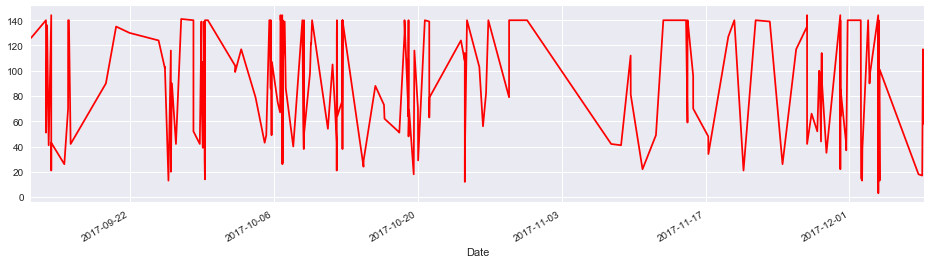

In [29]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

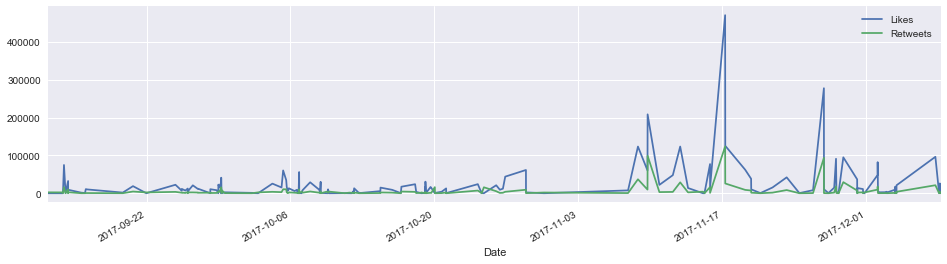

In [30]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [31]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Instagram


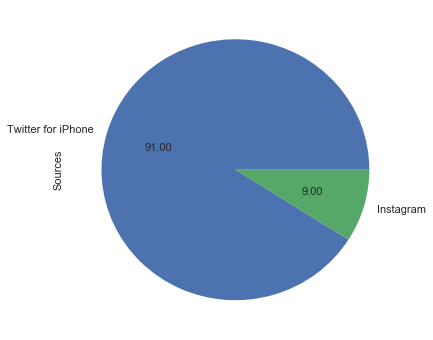

In [32]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [34]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [35]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@tiamaria68uk Plus a towel and a sign saying “...,58,939005893634506752,2017-12-08 05:37:05,Twitter for iPhone,555,56,0
1,"On Tuesday, SpaceX will attempt to refly both ...",117,938972633416306690,2017-12-08 03:24:55,Instagram,26009,4186,1
2,@tiamaria68uk Yes,17,938947119246860290,2017-12-08 01:43:32,Twitter for iPhone,443,17,0
3,@FortuneTech Do it,18,938816780444745728,2017-12-07 17:05:37,Twitter for iPhone,96365,21170,0
4,The *real* money comes from merchandising. I l...,101,937447589460426752,2017-12-03 22:24:56,Twitter for iPhone,21015,3827,1
5,@sm_carl Deal,13,937446602393841664,2017-12-03 22:21:01,Twitter for iPhone,849,30,0
6,That special hat delivery will take place deep...,140,937411489635241984,2017-12-03 20:01:30,Twitter for iPhone,10390,822,1
7,@NefuDaBoss Beyond anything you can imagine,43,937405455768346624,2017-12-03 19:37:31,Twitter for iPhone,942,46,0
8,"@TheRealUtkarsh And, at the risk of stating th...",73,937404412858740736,2017-12-03 19:33:22,Twitter for iPhone,1240,31,-1
9,@TheRealUtkarsh Because it’s stupid,35,937403444192624640,2017-12-03 19:29:31,Twitter for iPhone,1043,36,-1


In [36]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [37]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 39.5%
Percentage of neutral tweets: 40.5%
Percentage de negative tweets: 20.0%
